In [1]:
import tensorflow as tf
import numpy as np

In [13]:
x_data=np.linspace(-1,1,200)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)+noise

In [7]:
def add_layer(X,inputs,outputs,activation_function=None):
    Weight=tf.Variable(tf.random_normal([inputs,outputs]))
    Biases=tf.Variable(tf.zeros([1,outputs]))
    Wx_plus_B=tf.matmul(X,Weight)+Biases
    if activation_function is None:
        result=Wx_plus_B
    else:
        result=activation_function(Wx_plus_B)
    return result

In [5]:
X=tf.placeholder(tf.float32,[None,1])
Y=tf.placeholder(tf.float32,[None,1])

In [8]:
l1=add_layer(X,1,10,tf.nn.relu)
l2=add_layer(l1,10,1)

In [22]:
l3=add_layer(X,1,10,tf.nn.relu)
l4=add_layer(l1,10,1)

In [9]:
loss=tf.reduce_mean(tf.square(Y-l2))

In [23]:
loss2=tf.reduce_mean(tf.square(Y-l4))

In [10]:
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [24]:
train2=tf.train.GradientDescentOptimizer(0.1).minimize(loss2)

In [26]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [14]:
for i in range(1000):
    sess.run(train,{X:x_data,Y:y_data})
    if i%50==0:
        print(sess.run(loss,{X:x_data,Y:y_data}))

0.0372605
0.00689755
0.0052465
0.00474402
0.00437222
0.00408074
0.00388126
0.00371618
0.00359911
0.00351174
0.00345571
0.00341219
0.0033806
0.00335661
0.00333145
0.00331473
0.00330486
0.00329685
0.00328974
0.00328349


In [27]:
for i in range(1000):
    sess.run(train2,{X:x_data,Y:y_data})
    if i%50==0:
        print(sess.run(loss,{X:x_data,Y:y_data}))

0.267292
0.359334
0.3797
0.393249
0.405722
0.415035
0.415828
0.409463
0.399945
0.389518
0.378558
0.368708
0.360801
0.354249
0.347631
0.342029
0.337564
0.333827
0.331102
0.329139


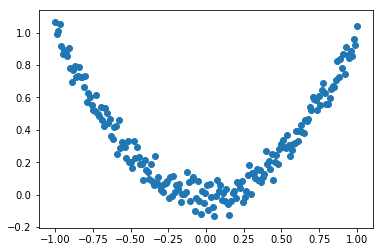

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

In [18]:
for i in range(1000):
    # training
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(l2, feed_dict={X: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)